# Decoding Temporal Relationships with `DynCRep`

Welcome to our tutorial on `DynCRep` - a cutting-edge tool from the _Probabilistic Generative 
Models for Network Analysis_ (`probinet`) package. Traditional network analysis models often fall 
short when it comes to capturing the dynamic nature of real-world networks.  `DynCRep` is designed to bridge this gap, providing a robust solution for analyzing and understanding the temporal evolution of complex networks.
 
The `DynCRep` (**Dyn**amic **C**ommunity and **Re**ci**p**rocity) model is a tool that helps us to 
better 
understand complex, evolving networks. In real-world scenarios, networks are rarely static. They 
change and evolve over time, influenced by various factors such as changing relationships, evolving interests, and temporal events. The `DynCRep` model captures these dynamic interaction patterns by considering the temporal order of connections between pairs of nodes in the network, rather than viewing them independently {cite}`safdari2022reciprocity`. This is a significant departure from standard models, which often assume that the connections between pairs of nodes are independent once we know certain hidden factors.  The `DynCRep` model integrates community structure and reciprocity as key structural information of networks that evolve over time.   In this tutorial, we will guide you through the process of applying the `DynCRep` model to a dynamic network.

> **_NOTE:_**  We suggest the reader to have a basic understanding of the `CRep` and `JointCRep` 
> models before diving into this tutorial. If you are not familiar with these models, we 
> recommend checking out our tutorials [`CRep` algorithm](./CRep.ipynb) and [`JointCRep` 
> algorithm](./JointCRep.ipynb) before proceeding with this one.

## Data generation

Before we dive into the tutorial, let's take a moment to understand the key idea behind the 
`DynCRep` model. The `DynCRep` model consider a temporal network as a sequence of adjacency 
matrices `A` where `A[t]` represents the adjacency matrix of the network at time _t_. The model 
takes in the sequence of adjacency matrices `A` and learns the parameters of the model that best 
describe the temporal relationships between nodes in the network. 

For this tutorial, we will use synthetic data generated using the `CRepDyn` class from the `probinet
synthetic.dynamic` module. This is the generative model created using the same modelling
assumptions as the `DynCRep` model. It takes in the parameters:
1. `N` - The number of nodes in the network.
2. `K` - The number of communities in the network.
3. `T` - The number of time steps in the network. 
4. `avg_degree` - The average degree of nodes in the network.
5. `structure` - The structure of the network. 
6. `ExpM` - The expected number of edges in the network. 
7. `eta` - The reciprocity parameter. 
8. `corr` - The correlation between u and v synthetically generated. 
9. `over` - The fraction of nodes with mixed membership. 
10. `undirected` - Whether the network is undirected. 

To gain a deeper understanding of how these parameters influence the model, we can experiment by 
adjusting some of them and observing the resulting changes. Let's begin with a straightforward scenario: a network with 50 nodes, divided into 2 communities, observed over a single time step. We'll set the average degree of the nodes to 5. We'll then examine the structure of the network when the parameters are set to create an assortative network.

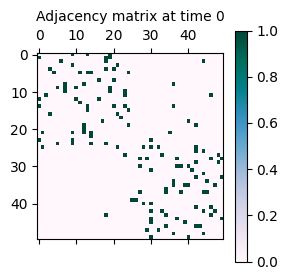

In [1]:
from probinet.synthetic.dynamic import SyntheticDynCRep

# Set the number of nodes, communities, and time steps
N = 50
K = 2
T = 0  # total number of time steps is T+1
avg_degree = 5

# Structure of the network
structure = "assortative"  # This is the default value

# Initialize the synthetic network class
synthetic_dyncrep = SyntheticDynCRep(
    N=N, K=K, T=T, verbose=2, avg_degree=avg_degree, figsize=(3, 3), fontsize=10
)

temporal_network = synthetic_dyncrep.generate_net()

As seen above, the network has been generated with the specified parameters and some statistics about it have been printed. It consists of 50 nodes clustered into 2 communities. The network is assortative, meaning that nodes are more likely to connect to nodes within the same community. This explains why the adjacency matrix 
looks like a diagonal-block matrix. Let's see what happens if the structure is changed to 
disassortative.

DEBUG:root:------------------------------
DEBUG:root:t=0
DEBUG:root:Number of nodes: 50 
Number of edges: 138
DEBUG:root:Average degree (2E/N): 5.52
DEBUG:root:Reciprocity at t: 0.11594202898550725
DEBUG:root:------------------------------


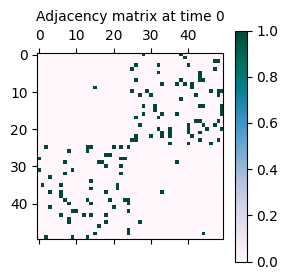

In [2]:
# Set logging level to DEBUG
import logging

# Make it be set to DEBUG
logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

# Structure of the network
structure = "disassortative"

# Initialize the synthetic network class
synthetic_dyncrep = SyntheticDynCRep(
    N=N,
    K=K,
    T=T,
    verbose=2,
    avg_degree=avg_degree,
    figsize=(3, 3),
    fontsize=10,
    structure=structure,
)

# Generate synthetic dynamic network
temporal_network = synthetic_dyncrep.generate_net()

As seen above, the network now has a disassortative structure, meaning that nodes are more likely
 to connect to nodes in different communities. This is reflected in the adjacency matrix, which 
 has connections off the diagonal. 
 
Notice that the generated network has about 140 edges. If we want to generate a network with a 
larger number of edges, we can increase the `ExpM` parameter. Let's see what happens when we set it to 200.

DEBUG:root:------------------------------
DEBUG:root:t=0
DEBUG:root:Number of nodes: 50 
Number of edges: 201
DEBUG:root:Average degree (2E/N): 8.04
DEBUG:root:Reciprocity at t: 0.11940298507462686
DEBUG:root:------------------------------


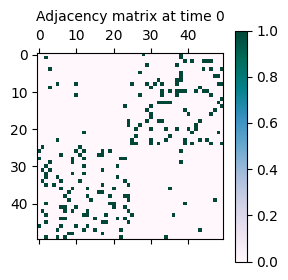

In [3]:
# Set the expected number of edges
ExpM = 200

# Initialize the synthetic network class
synthetic_dyncrep = SyntheticDynCRep(
    N=N,
    K=K,
    T=T,
    verbose=2,
    avg_degree=avg_degree,
    figsize=(3, 3),
    fontsize=10,
    structure=structure,
    ExpM=ExpM,
)

# Generate synthetic dynamic network
temporal_network = synthetic_dyncrep.generate_net()

Now the resulting network has about 200 edges, as specified by the `ExpM` parameter.

Another key element of the `DynCRep` model is the reciprocity parameter `eta`. This parameter 
determines the level of reciprocity in the network, i.e., the likelihood that a connection between
 two nodes is reciprocated. The difference between this reciprocity parameter and the one 
 introduced in the standard `CRep` model is that the dependency on the reciprocated tie is on the 
 previous time step, while standard `CRep` considers only the same time _t_, being an approach 
 valid for static networks. Let's see how the network structure changes with different values of 
 `eta`. By default, the `eta` parameter is set to 0. Let's see what happens when we increase to 0
 .5. Notice that to observe the effect of the reciprocity parameter, we need to generate a 
 network with more than one time step.

DEBUG:root:------------------------------
DEBUG:root:t=0
DEBUG:root:Number of nodes: 50 
Number of edges: 133
DEBUG:root:Average degree (2E/N): 5.32
DEBUG:root:Reciprocity at t: 0.09022556390977443
DEBUG:root:------------------------------
DEBUG:root:------------------------------
DEBUG:root:t=1
DEBUG:root:Number of nodes: 50 
Number of edges: 149
DEBUG:root:Average degree (2E/N): 5.96
DEBUG:root:Reciprocity at t: 0.2684563758389262
DEBUG:root:------------------------------
DEBUG:root:Compare current and previous reciprocity.
DEBUG:root:Time step: 1
DEBUG:root:Number of non-zero elements in the adjacency matrix at time t: 149.0
DEBUG:root:Fraction of non-zero elements in the transposed adjacency matrix at time t: 0.2684563758389262
DEBUG:root:Fraction of non-zero elements in the transposed adjacency matrix at time t-1: 0.19463087248322147


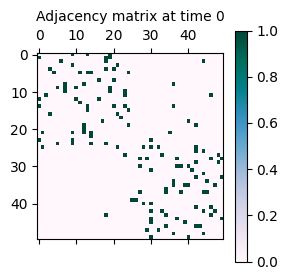

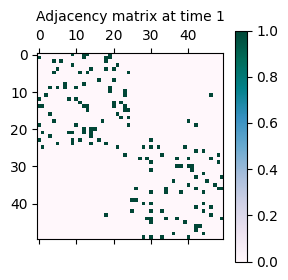

In [4]:
# Set the number of time steps
T = 1

# Set the reciprocity parameter
eta = 0.5

# Initialize the synthetic network class
synthetic_dyncrep = SyntheticDynCRep(
    N=N,
    K=K,
    T=T,
    verbose=2,
    avg_degree=avg_degree,
    figsize=(3, 3),
    fontsize=10,
    eta=eta,
)

# Generate synthetic dynamic network
temporal_network = synthetic_dyncrep.generate_net()

As seen above (more concretely in the graph statistics), the reciprocity in the second time step 
network is higher than in the first time step network. This is because the `eta` parameter has been
 set to 0.5, which increases the likelihood of reciprocated connections in the network. From a 
 graphical perspective, the network structure is more clustered in the second time step, given 
 that the existing connections `(i,j)` in the first time step are more likely to be reciprocated 
 as `(j,i)` in the second time step. 


## Decoding Temporal Relationships with `DynCRep`

Now that we are more familiar with the generative model, let's move on to the next step: decoding
 the temporal relationships in the network using the `DynCRep` model. For the actual analysis, we
  will generate a synthetic network with 300 nodes, divided into 3 communities, and observed over
   6 time steps. We will set the average degree of the nodes to 10 and the reciprocity parameter 
   to 0.5. 

DEBUG:root:------------------------------
DEBUG:root:t=0
DEBUG:root:Number of nodes: 300 
Number of edges: 1479
DEBUG:root:Average degree (2E/N): 9.86
DEBUG:root:Reciprocity at t: 0.0392156862745098
DEBUG:root:------------------------------
DEBUG:root:------------------------------
DEBUG:root:t=1
DEBUG:root:Number of nodes: 300 
Number of edges: 1623
DEBUG:root:Average degree (2E/N): 10.82
DEBUG:root:Reciprocity at t: 0.17621688231669747
DEBUG:root:------------------------------
DEBUG:root:------------------------------
DEBUG:root:t=2
DEBUG:root:Number of nodes: 300 
Number of edges: 1724
DEBUG:root:Average degree (2E/N): 11.493
DEBUG:root:Reciprocity at t: 0.24013921113689096
DEBUG:root:------------------------------
DEBUG:root:------------------------------
DEBUG:root:t=3
DEBUG:root:Number of nodes: 300 
Number of edges: 1767
DEBUG:root:Average degree (2E/N): 11.78
DEBUG:root:Reciprocity at t: 0.2693831352574986
DEBUG:root:------------------------------
DEBUG:root:-------------------

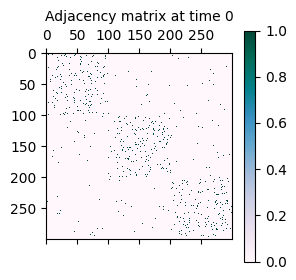

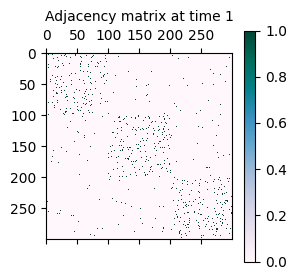

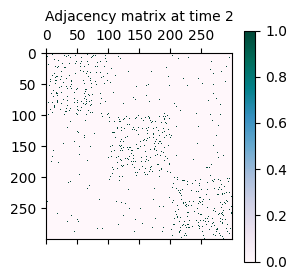

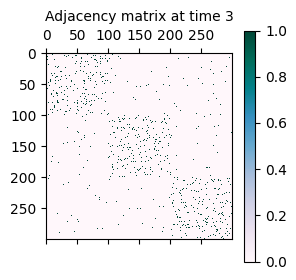

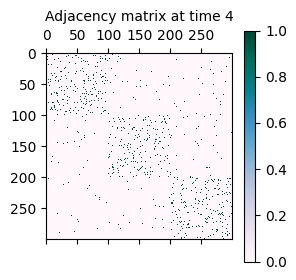

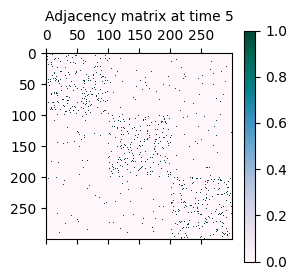

In [5]:
# Set the number of nodes, communities, and time steps
N = 300
K = 3
T = 5
avg_degree = 10
eta = 0.5

# Initialize the synthetic network class
synthetic_dyncrep = SyntheticDynCRep(
    N=N,
    K=K,
    T=T,
    verbose=2,
    avg_degree=avg_degree,
    figsize=(3, 3),
    fontsize=10,
    eta=eta,
)

# Generate synthetic dynamic network
A = synthetic_dyncrep.generate_net()

As mentioned initially, the synthetically generated network is a sequence of adjacency matrices `A` where `A[t]` represents the adjacency matrix of the network at time `t`. 

In [6]:
A

To utilize the `DynCRep` model, we need to transform the sequence of adjacency matrices `A` into 
a sequence of adjacency tensors `B`, where `B` is a numpy adjacency tensor derived from a 
NetworkX graph. The `build_B_from_A` function from the `probinet.input.preprocessing` module can be used to perform this transformation. The function takes in the sequence of adjacency matrices `A` and the list of nodes in the network and returns the adjacency tensor `B`.

In [7]:
from probinet.input.preprocessing import create_adjacency_tensor_from_graph_list

In [8]:
nodes = list(A[0].nodes())

In [9]:
B, _ = create_adjacency_tensor_from_graph_list(A, nodes=nodes)

Done! We now have the adjacency tensor `B` of dimensions `(T+1, N, N)` where `T` is the number of time steps, and `N` is the number of nodes in the network. The adjacency tensor `B` is a numpy array that can be used as input to the `DynCRep` model.

In [10]:
B.shape

(6, 300, 300)

In [11]:
from probinet.models.dyncrep import DynCRep

First, we instantiate the `DynCRep` model by creating an instance of the class. During this process, we can modify the default attribute values by specifying our desired maximum number of iterations and the number of realizations. The `max_iter` parameter sets the maximum number of iterations for the optimization algorithm, and the `num_realizations` parameter defines the number of times the model will run.

In [12]:
dyncrep = DynCRep(max_iter=2000, num_realizations=3)

In [13]:
T = B.shape[0] - 1

We can now fit the `DynCRep` model to the adjacency tensor `B` using the `fit` function using 
also the number of time steps `T`, the list of nodes in the network, and other parameters. Given 
that the data has been generated using `K=3`, we will change the file to reflect this.  The model
 returns the learned parameters of the model, including the community memberships `u`, `v`, the
 temporal relationships `w` between the communities, the reciprocity parameter `eta`, the edge 
 disappearance  rate `beta`  and the  log-likelihood of  the  model.
 > **_NOTE:_** The parameters `ag` and `bg` are the hyperparameters of the gamma distribution, 
 > which is used for regularization. The authors of the main reference assume gamma-distributed 
 > priors for the membership vectors. We fix them to 1.1 and 0.5, respectively.

In [14]:
from probinet.models.classes import GraphData

# Build the GraphData object to pass to the fit method
gdata = GraphData(
    graph_list=None,
    adjacency_tensor=B,
    transposed_tensor=None,
    nodes=nodes,
    data_values=None,
)

u_dyn, v_dyn, w_dyn, eta_dyn, beta_dyn, Loglikelihood_dyn = dyncrep.fit(
    gdata,
    T=T,
    K=K,
    nodes=nodes,
    ag=1.1,
    bg=0.5,
    out_inference=False,
)

INFO:root:### Version: w-DYN ###
DEBUG:root:Fixing random seed to: 0
DEBUG:root:Number of time steps L: 6
DEBUG:root:T is greater than 0. Proceeding with calculations that require multiple time steps.
DEBUG:root:Random number generator seed: 0
DEBUG:root:eta is initialized randomly.
DEBUG:root:u, v and w are initialized randomly.
DEBUG:root:Updating realization 0 ...
DEBUG:root:num. realization = 0 - iterations = 100 - time = 4.47 seconds
DEBUG:root:num. realization = 0 - iterations = 200 - time = 9.48 seconds
DEBUG:root:num. realization = 0 - iterations = 300 - time = 14.02 seconds
DEBUG:root:num. realization = 0 - iterations = 400 - time = 18.14 seconds
DEBUG:root:num. realization = 0 - iterations = 500 - time = 22.27 seconds
DEBUG:root:num. realization = 0 - iterations = 600 - time = 26.64 seconds
DEBUG:root:num. realization = 0 - iterations = 700 - time = 30.89 seconds
DEBUG:root:num. realization = 0 - iterations = 800 - time = 34.99 seconds
DEBUG:root:num. realization = 0 - iterat

The `DynCRep` model has been effectively applied to the adjacency tensor `B`, with the fitting process carried out over three realizations, all of which achieved successful convergence. As detailed in the referenced paper and other tutorials, the vectors `u` and `v` represent the outgoing and incoming community memberships of the network's nodes, respectively, and remain constant over time. Conversely, the affinity matrix, which delineates the edge density within and between communities, is a time-dependent function. By utilizing the `plot_matrices` function outlined below, we can observe the evolution of these relationships over time.
    
> **_NOTE:_** You might be curious as to why the parameters `u` and `v` remain 
> constant over time. As outlined in the primary reference, it's not necessary to estimate these 
> parameters at every time step. The model is designed to estimate them just once. This is part 
> of the first approach,  where the affinity matrix is treated as a time-dependent variable, 
> while the community membership vectors, `u` and `v`, are kept static over time. It's worth 
> noting that an alternative interpretation could involve fixing `w` and allowing `u` and `v` to 
> change over time. As explained by the authors, the model can be easily adapted to accommodate 
> this alternative scenario.

In [15]:
w_dyn.shape

(6, 3, 3)

In [16]:
# Set the colormap for the plots
cmap = "PuBuGn"
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize


def plot_matrices(w, cmap="PuBuGn"):
    """
    Plot a temporal array in a row of subplots with a single shared colorbar.

    Parameters
    ----------
    w : np.ndarray
        Temporal array to plot.
    cmap : str, optional
        Colormap to use for the plots. Default is 'PuBuGn'.
    """
    # Get the number of time steps
    T = w.shape[0]

    # Normalize the data for consistent color mapping
    norm = Normalize(vmin=np.min(w), vmax=np.max(w))

    # Create a new figure with specified size
    fig, axes = plt.subplots(1, T, figsize=(3 * T, 3), constrained_layout=True)

    # Loop over each time step
    for t in range(T):
        # Add a subplot for the current time step
        if T == 1:
            ax = axes
        else:
            ax = axes[t]

        # Display the matrix as an image
        cax = ax.imshow(
            w[t], cmap=cmap, norm=norm, interpolation="nearest", extent=[0, 3, 0, 3]
        )

        # Add a title to the subplot
        ax.set_title("Time step: " + str(t), fontsize=18)

        # Set ticks to be at 0.5, 1.5, 2.5 but show as 0, 1, 2
        ax.set_xticks([0.5, 1.5, 2.5])
        ax.set_yticks([0.5, 1.5, 2.5])

        # Set tick labels to 0, 1, 2
        ax.set_xticklabels([0, 1, 2])
        ax.set_yticklabels([2, 1, 0])

    # Add a single colorbar to the figure
    fig.colorbar(cax, ax=axes, orientation="vertical", fraction=0.046, pad=0.04)

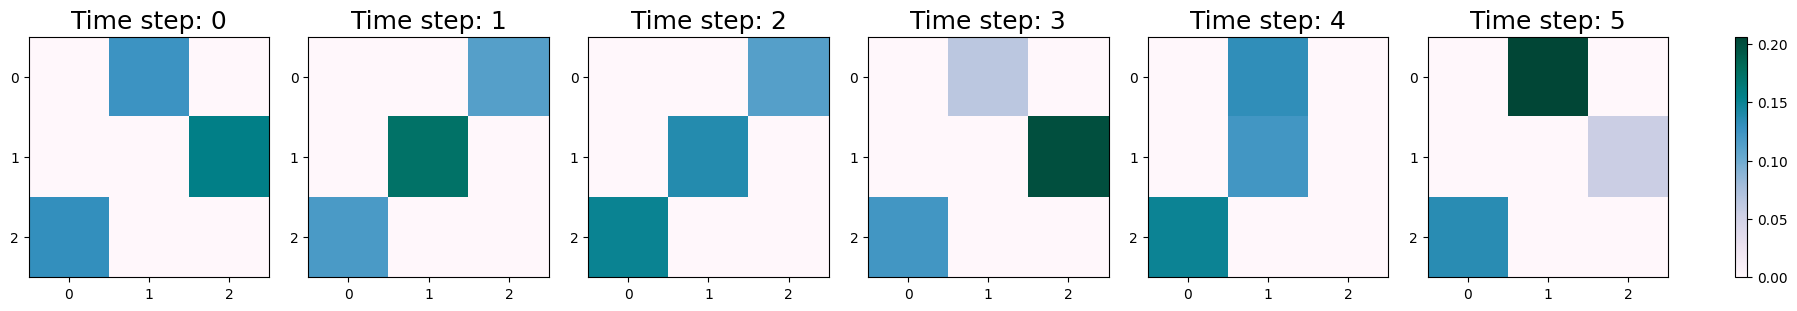

In [17]:
plot_matrices(w_dyn)

The interactions between communities vary across different timesteps, as depicted in the visualizations. These interactions, in conjunction with the vectors `u` and `v`, provide insights into the temporal evolution of community memberships. 

To further our understanding, we can compare the inferred community memberships with the ground 
truth data used to train the model. This comparison is facilitated by constructing an overall 
membership matrix, which contains the community clustering patterns of nodes at each timestep.

In [18]:
from probinet.evaluation.expectation_computation import (
    compute_expected_adjacency_tensor,
)
from probinet.utils.matrix_operations import transpose_tensor

# Define the number of time steps
T = B.shape[0] - 1

# Compute the expected adjacency tensor
lambda_inf_dyn = compute_expected_adjacency_tensor(u_dyn, v_dyn, w_dyn[0])

# Compute the inferred membership tensor
M_inf_dyn = lambda_inf_dyn + eta_dyn * transpose_tensor(B)

The comparison between the two temporal arrays can be done using the `calculate_AUC` function 
from the `probinet.output.evaluate` module. This function calculates the Area Under the Curve (AUC) 
for the given temporal arrays. We can use this function to compute the AUC for each time step, i
.e.,  the probability that a randomly selected edge has higher expected value than a randomly 
selected non-existing edge. A value of 1 means perfect reconstruction, while 0.5 is pure random chance. 

In [21]:
from probinet.evaluation.link_prediction import compute_link_prediction_AUC
from probinet.utils.tools import flt

# Compute the AUC for each time step
for t in range(T + 1):
    print(
        f"Time step {t}: AUC = {flt(compute_link_prediction_AUC(M_inf_dyn[t],B[t].astype('int')))}"
    )

NameError: name 'T' is not defined

As we can see, the results obtained from the `DynCRep` model show a high AUC value for each time.
 We can also get a graphical feeling about how the inferred temporal relationships compare to the ground truth data by using the `plot_temporal_arrays` function defined below.

In [25]:
def plot_temporal_arrays(arrays, titles=None, cmap="PuBuGn"):
    """
    Plot a list of temporal arrays in separate columns.

    Parameters
    ----------
    arrays : list of np.ndarray
        List of temporal arrays to plot.
    cmap : str, optional
        Colormap to use for the plots. Default is 'PuBuGn'.
    """
    # Get the number of time steps from the first array in the list
    T = arrays[0].shape[0] - 1

    # Create a new figure with specified size
    plt.figure(figsize=(3 * len(arrays), 10))

    # Loop over each time step
    for t in range(T + 1):
        # Loop over each array
        for i, array in enumerate(arrays):
            # Add a subplot for the current array at the current time step
            plt.subplot(T + 1, len(arrays), i + len(arrays) * t + 1)

            # Display the array as an image
            plt.imshow(array[t], cmap=cmap, interpolation="nearest")

            # Add a colorbar to the plot
            plt.colorbar(fraction=0.046)

            # Add a title to the first subplot of each column
            if t == 0:
                if titles is not None:
                    plt.title(titles[i])
                else:
                    plt.title(f"Array {i+1}")

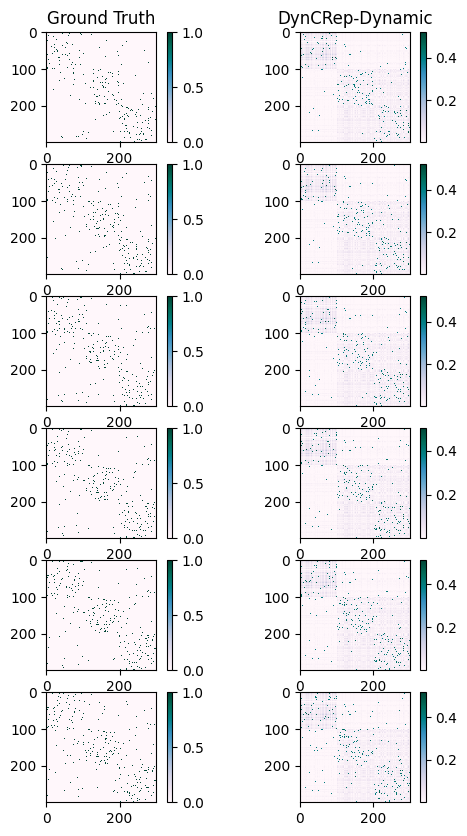

In [21]:
plot_temporal_arrays([B, M_inf_dyn], titles=["Ground Truth", "DynCRep-Dynamic"])

As detailed in the research paper, the `DynCRep` algorithm operates in two distinct modes: 
`Dynamic` and `Static`. The `Dynamic` mode (also known as _w-DYN_), which is the default setting, 
captures 
and 
stores 
temporal relationships in a time-dependent affinity matrix, allowing for a nuanced understanding 
of evolving community structures. On the other hand, the `Static` mode (also known as _w-STATIC_, 
despite `u`, 
`v` and `w` being fixed in time, still allows for network evolution. This is 
facilitated by
 the appearance and disappearance of edges, governed by the parameters `beta` and `eta`. These two 
 modes 
 enhance the flexibility of the model, enabling it to effectively handle a variety of community structures. 
 
Let's see now how to use the `Static` mode of the `DynCRep` model to decode the temporal 
relationships in the network. We will use the same synthetic network generated earlier, but this 
time we will fit the `DynCRep` model in `Static` mode by setting the `temporal` parameter to `False`.

In [22]:
u_stat, v_stat, w_stat, eta_stat, beta_stat, Loglikelihood = dyncrep.fit(
    gdata,
    T=T,
    flag_data_T=0,
    ag=1.1,
    bg=0.5,
    temporal=False,  # <- Static mode
    out_inference=False,
)

INFO:root:### Version: w-STATIC ###
DEBUG:root:Fixing random seed to: 0
DEBUG:root:Number of time steps L: 1
DEBUG:root:T is greater than 0. Proceeding with calculations that require multiple time steps.
DEBUG:root:Random number generator seed: 0
DEBUG:root:eta is initialized randomly.
DEBUG:root:u, v and w are initialized randomly.
DEBUG:root:Updating realization 0 ...
DEBUG:root:num. realization = 0 - iterations = 100 - time = 0.70 seconds
DEBUG:root:num. realization = 0 - iterations = 200 - time = 1.33 seconds
DEBUG:root:num. realization = 0 - iterations = 300 - time = 1.92 seconds
DEBUG:root:num. realizations = 0 - Log-likelihood = -26306.340911530962 - iterations = 341 - time = 2.25 seconds - convergence = True
DEBUG:root:Random number generator seed: 3440222609
DEBUG:root:eta is initialized randomly.
DEBUG:root:u, v and w are initialized randomly.
DEBUG:root:Updating realization 1 ...
DEBUG:root:num. realization = 1 - iterations = 100 - time = 1.11 seconds
DEBUG:root:num. realiza

As shown before, the affinity matrix `w` is now a constant matrix. 

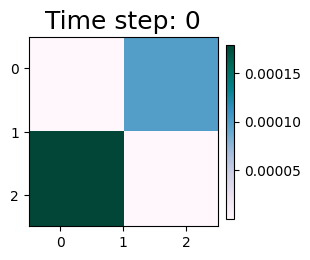

In [23]:
plot_matrices(w_stat)

We have shown this way how to use the `DynCRep` model to decode the temporal relationships in a network. The model provides a powerful framework for understanding the dynamic nature of complex networks, capturing the temporal evolution of community structures and reciprocity.  We hope this tutorial has provided you with a solid foundation for working with the `DynCRep` model and decoding temporal relationships in dynamic networks.